# **Comparison of Turbulence Models with Respect to Skin Friction *'C<sub>f</sub>'***

This notebook compares to two turbulence models in terms of skin friction. ('*kOmegaSST*' and '*SpalartAllmaras*')

In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# increase dpi and use latex rendering
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

# Set macro for paths
run = "../run/"
comparison = "./output/comparison/"
!mkdir -p output
!mkdir -p output/comparison

## **1. Set Related Variables in Accordance with the Case Data**

In [2]:
UInf = 69.4
nuInf = 1.388e-05
model = "kOmegaSST"
model_sa = "SpalartAllmaras"
yp = ['0.05', '1', '2', '5', '10', '30', '50', '100']
res_list = ['1e-5']

## **2. Load Data**

### 2-1. '*kOmegaSST*' Model with Wall Functions

In [3]:
tauw_path = [run + 'turbulentFlatPlate/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data = [pd.read_csv(tauw_path[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-48.5054,-0.963718,0
1,0.001458,-19.7445,-0.005151,0
2,0.002433,-14.3437,-0.001133,0
3,0.003410,-12.0417,-0.000543,0
4,0.004390,-10.6470,-0.000347,0


### 2-2. '*SpalartAllmaras*' Model with Wall Functions

In [4]:
tauw_path_sa = [run + 'turbulentFlatPlate_SA/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model_sa, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_sa = [pd.read_csv(tauw_path_sa[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_sa[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-48.3374,-0.943654,0
1,0.001458,-21.1201,-0.004816,0
2,0.002433,-16.4140,-0.000939,0
3,0.003410,-14.7323,-0.000377,0
4,0.004390,-13.8445,-0.000209,0


### 2-3. '*kOmegaSST*' Model without Wall Functions

In [5]:
tauw_path_noWallFunc = [run + 'turbulentFlatPlate_noWallFunc/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_noWallFunc = [pd.read_csv(tauw_path_noWallFunc[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_noWallFunc[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-48.5051,-0.963711,0
1,0.001458,-19.7443,-0.005151,0
2,0.002433,-14.3434,-0.001133,0
3,0.003410,-12.0414,-0.000543,0
4,0.004390,-10.6464,-0.000347,0


### 2-4. '*SpalartAllmaras*' Model without Wall Functions

In [6]:
tauw_path_noWallFunc_sa = [run + 'turbulentFlatPlate_SA_noWallFunc/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model_sa, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_noWallFunc_sa = [pd.read_csv(tauw_path_noWallFunc_sa[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_noWallFunc_sa[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-48.3374,-0.943654,0
1,0.001458,-21.1201,-0.004816,0
2,0.002433,-16.4140,-0.000939,0
3,0.003410,-14.7323,-0.000377,0
4,0.004390,-13.8445,-0.000209,0


## **3. Calculation of *'Re<sub>x</sub>'* and *'C<sub>f</sub>'***

### 3-1. '*kOmegaSST*' Model with Wall Functions

In [7]:
x0 = 0
Rex = (tauw_data[0]['ccx'] - x0)*UInf/nuInf
Cf = [np.sqrt(tauw_data[i + len(res_list)*j]['tau_xx']**2 + tauw_data[i + len(res_list)*j]['tau_yy']**2 + tauw_data[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]

### 3-2. '*SpalartAllmaras*' Model with Wall Functions

In [8]:
Cf_sa = [np.sqrt(tauw_data_sa[i + len(res_list)*j]['tau_xx']**2 + tauw_data_sa[i + len(res_list)*j]['tau_yy']**2 + tauw_data_sa[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]

### 3-3. '*kOmegaSST*' Model without Wall Functions

In [9]:
Cf_noWallFunc = [np.sqrt(tauw_data_noWallFunc[i + len(res_list)*j]['tau_xx']**2 + tauw_data_noWallFunc[i + len(res_list)*j]['tau_yy']**2 + tauw_data_noWallFunc[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]

### 3-4. '*SpalartAllmaras*' Model without Wall Functions

In [10]:
Cf_noWallFunc_sa = [np.sqrt(tauw_data_noWallFunc_sa[i + len(res_list)*j]['tau_xx']**2 + tauw_data_noWallFunc_sa[i + len(res_list)*j]['tau_yy']**2 + tauw_data_noWallFunc_sa[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]

## **4. Wieghardt's Equation**

In [11]:
wieghardt = 0.288*(np.log10(Rex))**(-2.45)

## **5. Plot**

### 5-1. '*kOmegaSST*' Model with Wall Functions

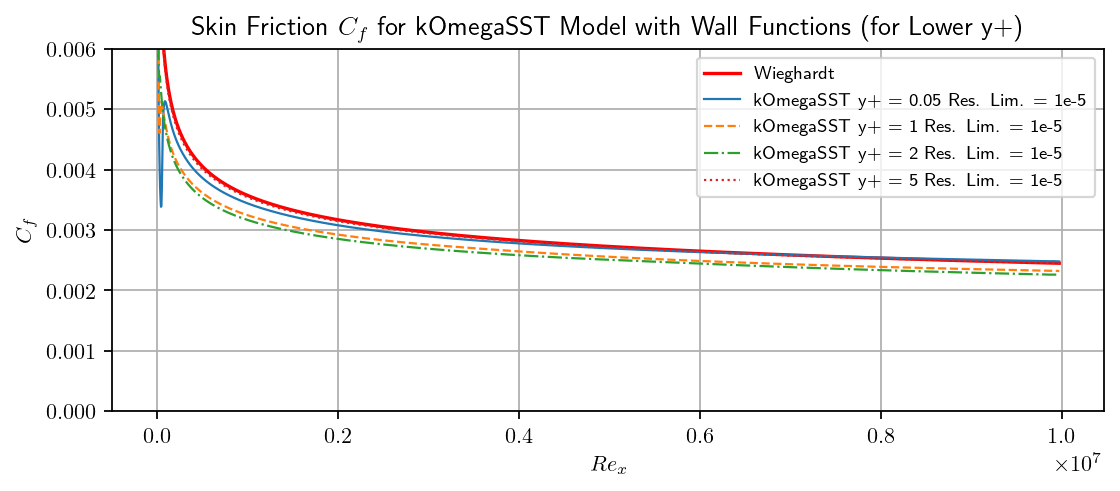

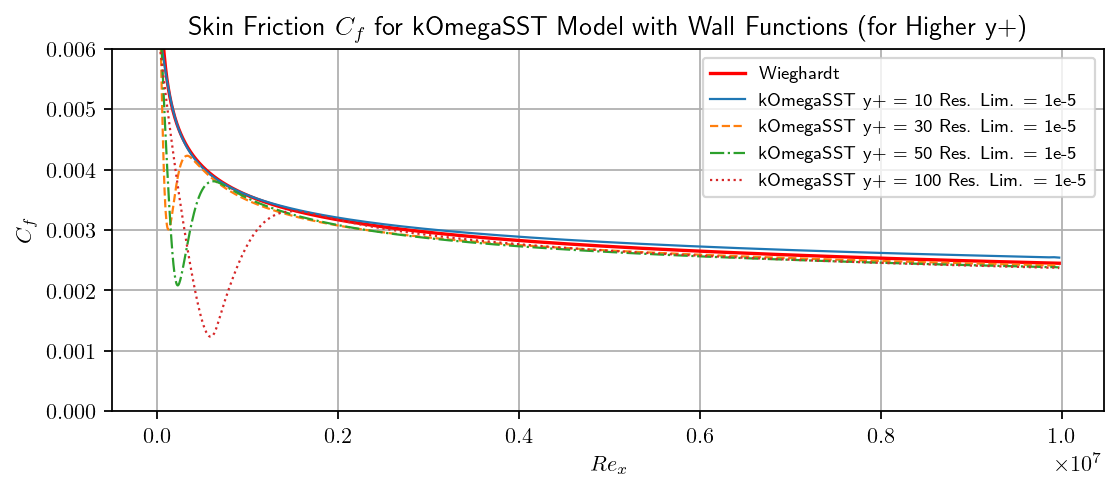

In [12]:
style = ["-", "--", "-.", ":"]
text_yp = ["Lower", "Higher"]
lw = 1.0
for j in range(len(text_yp)):
    fig, ax = plt.subplots(1, 1, figsize=(8, 3))
    plt.ylim([0, 0.006])
    plt.grid()
    ax.set_xlabel(r"$Re_x$")
    ax.set_ylabel(r"$C_f$")
    plt.title(r"Skin Friction $C_f$ for {} Model with Wall Functions (for {} y+)".format(model, text_yp[j]))
    ax.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
    for i in range(int(len(yp)/2)):
        ax.plot(Rex, Cf[i+int(len(yp)/2)*j], label = "{} y+ = {} Res. Lim. = 1e-5".format(model, yp[i+int(len(yp)/2)*j]), ls = style[i], c = "C{:d}".format(i), lw = lw)
        ax.legend(fontsize = 8)
    plt.savefig(comparison + "tauw_{}yp_{}_withWallFunc.pdf".format(text_yp[j], model), bbox_inches="tight")

### 5-2. '*SpalartAllmaras*' Model with Wall Functions

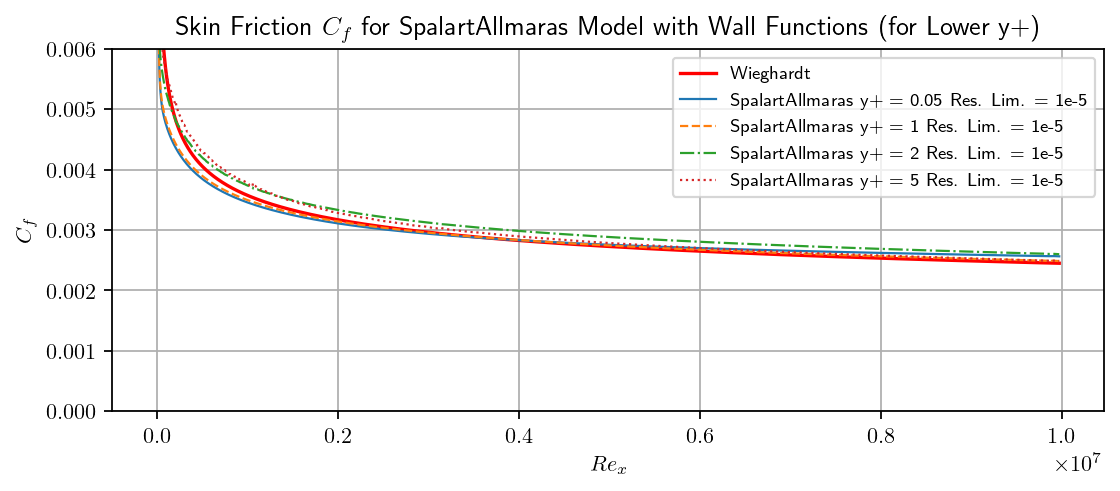

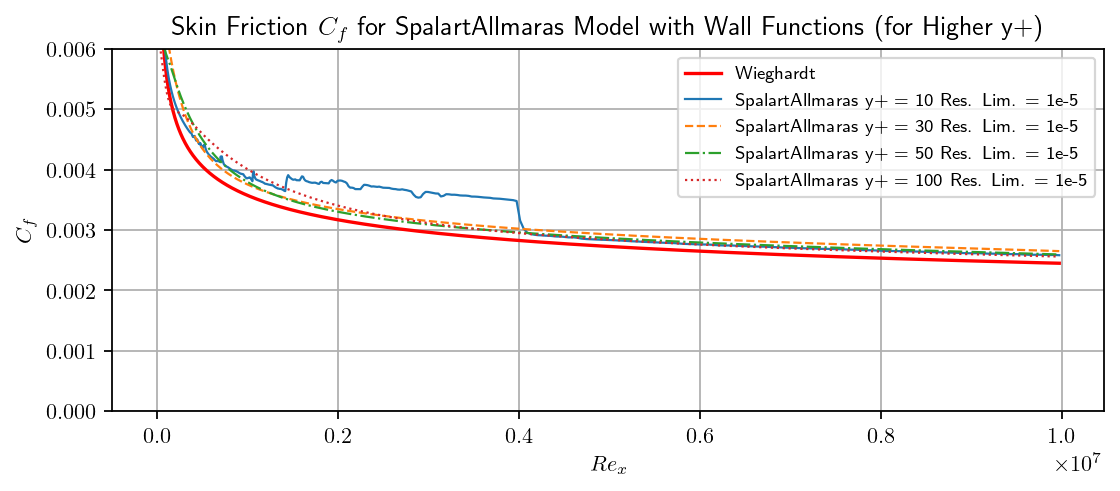

In [13]:
style2 = ["-", "--", "-.", ":"]
text_yp2 = ["Lower", "Higher"]
lw2 = 1.0
for j in range(len(text_yp2)):
    fig2, ax2 = plt.subplots(1, 1, figsize=(8, 3))
    plt.ylim([0, 0.006])
    plt.grid()
    ax2.set_xlabel(r"$Re_x$")
    ax2.set_ylabel(r"$C_f$")
    plt.title(r"Skin Friction $C_f$ for {} Model with Wall Functions (for {} y+)".format(model_sa, text_yp2[j]))
    ax2.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
    for i in range(int(len(yp)/2)):
        ax2.plot(Rex, Cf_sa[i+int(len(yp)/2)*j], label = "{} y+ = {} Res. Lim. = 1e-5".format(model_sa, yp[i+int(len(yp)/2)*j]), ls = style2[i], c = "C{:d}".format(i), lw = lw2)
        ax2.legend(fontsize = 8)    
    plt.savefig(comparison + "tauw_{}yp_{}_withWallFunc.pdf".format(text_yp[j], model_sa), bbox_inches="tight")

### 5-3. '*kOmegaSST*' Model without Wall Functions

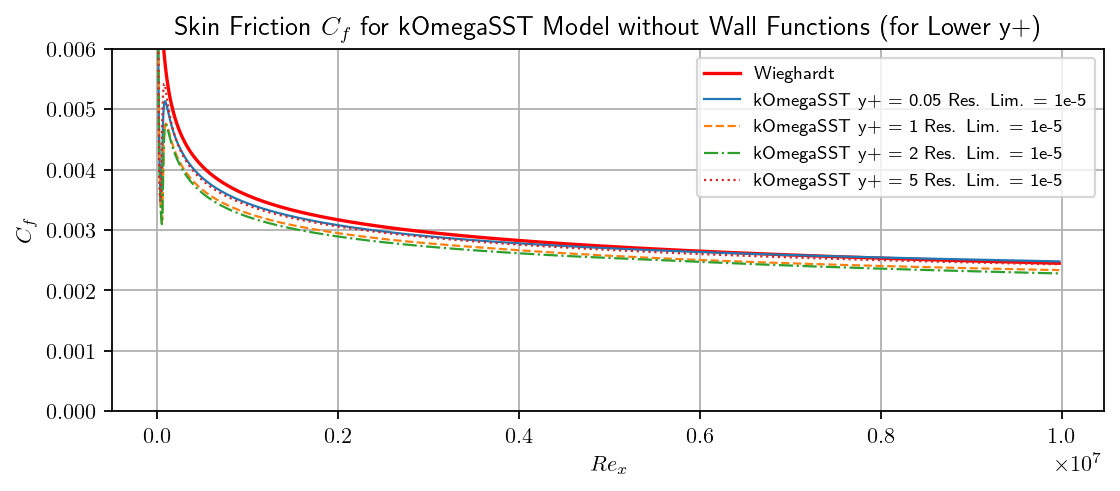

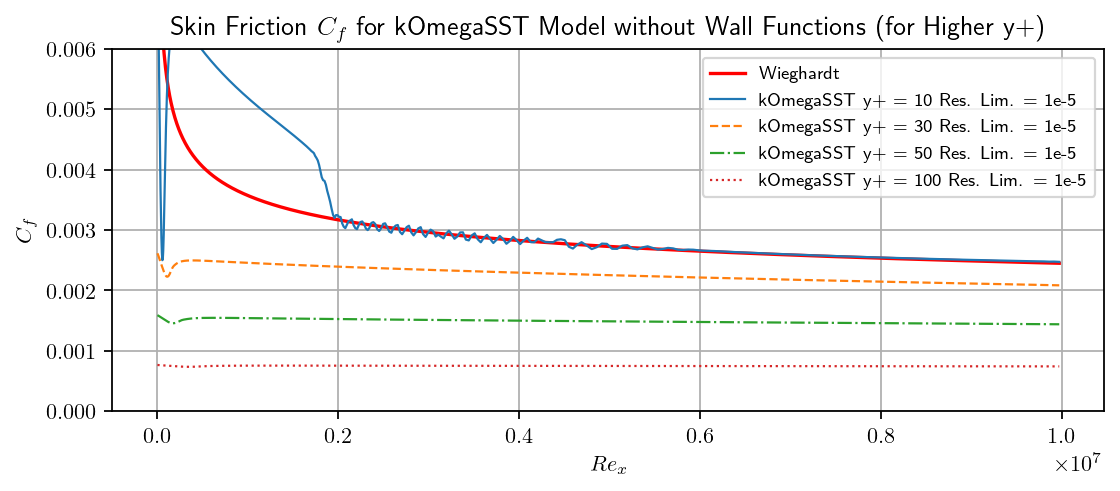

In [14]:
style3 = ["-", "--", "-.", ":"]
text_yp3 = ["Lower", "Higher"]
lw3 = 1.0
for j in range(len(text_yp3)):
    fig3, ax3 = plt.subplots(1, 1, figsize=(8, 3))
    plt.ylim([0, 0.006])
    plt.grid()
    ax3.set_xlabel(r"$Re_x$")
    ax3.set_ylabel(r"$C_f$")
    plt.title(r"Skin Friction $C_f$ for {} Model without Wall Functions (for {} y+)".format(model, text_yp3[j]))
    ax3.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
    for i in range(int(len(yp)/2)):
        ax3.plot(Rex, Cf_noWallFunc[i+int(len(yp)/2)*j], label = "{} y+ = {} Res. Lim. = 1e-5".format(model, yp[i+int(len(yp)/2)*j]), ls = style3[i], c = "C{:d}".format(i), lw = lw3)
        ax3.legend(fontsize = 8)
    plt.savefig(comparison + "tauw_{}yp_{}_noWallFunc.pdf".format(text_yp[j], model), bbox_inches="tight")

### 5-4. '*SpalartAllmaras*' Model without Wall Functions

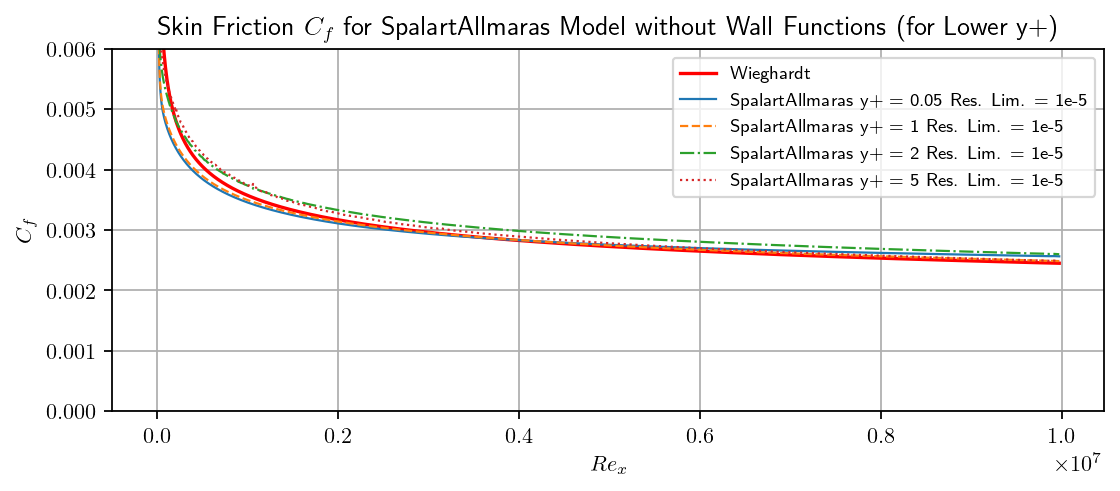

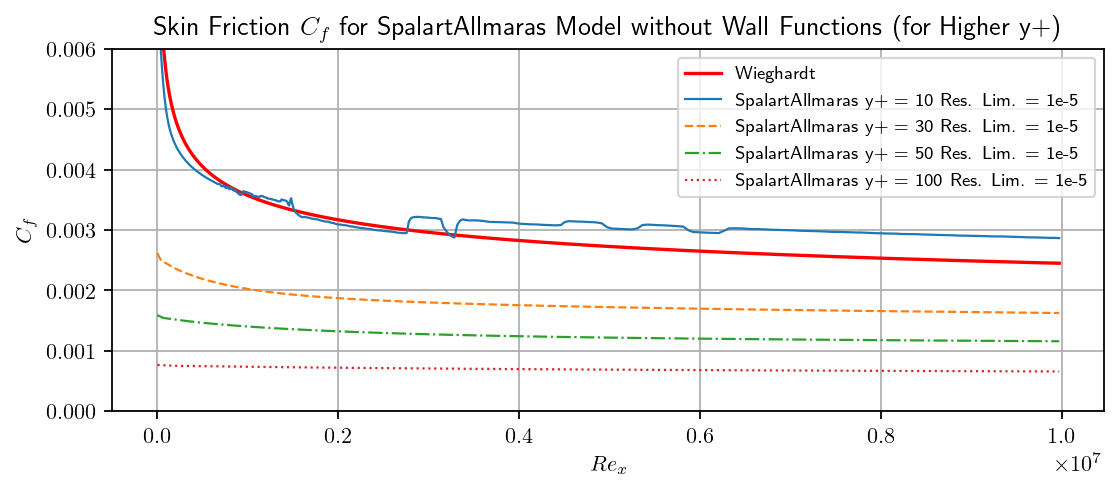

In [15]:
style4 = ["-", "--", "-.", ":"]
text_yp4 = ["Lower", "Higher"]
lw4 = 1.0
for j in range(len(text_yp4)):
    fig4, ax4 = plt.subplots(1, 1, figsize=(8, 3))
    plt.ylim([0, 0.006])
    plt.grid()
    ax4.set_xlabel(r"$Re_x$")
    ax4.set_ylabel(r"$C_f$")
    plt.title(r"Skin Friction $C_f$ for {} Model without Wall Functions (for {} y+)".format(model_sa, text_yp4[j]))
    ax4.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
    for i in range(int(len(yp)/2)):
        ax4.plot(Rex, Cf_noWallFunc_sa[i+int(len(yp)/2)*j], label = "{} y+ = {} Res. Lim. = 1e-5".format(model_sa, yp[i+int(len(yp)/2)*j]), ls = style4[i], c = "C{:d}".format(i), lw = lw4)
        ax4.legend(fontsize = 8)
    plt.savefig(comparison + "tauw_{}yp_{}_noWallFunc.pdf".format(text_yp[j], model_sa), bbox_inches="tight")

### 5-5. Comparison of Two Models (with Wall Functions)

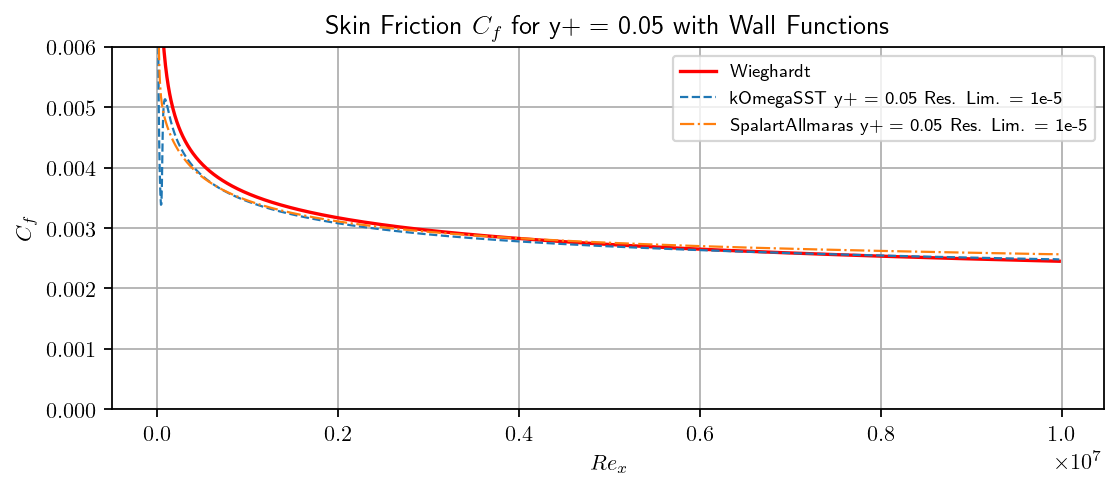

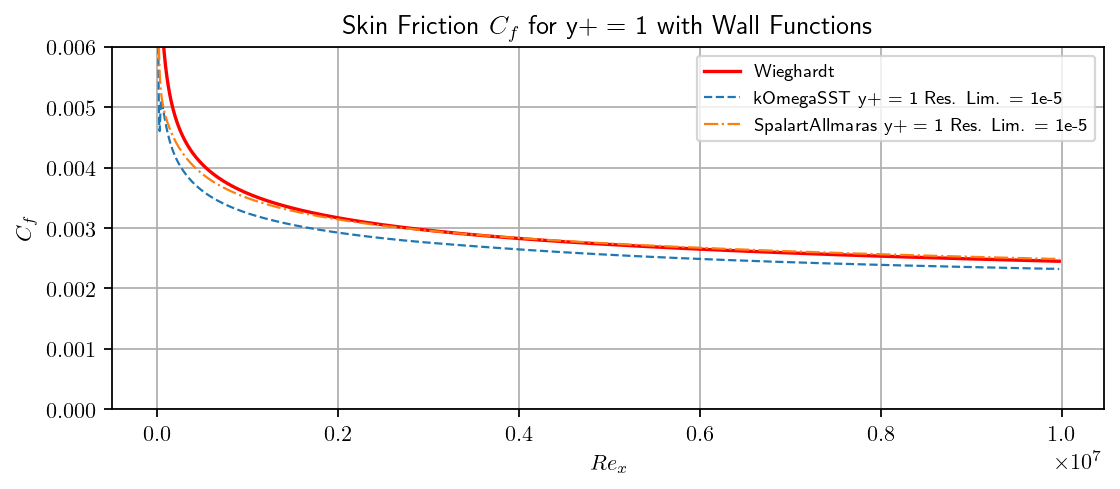

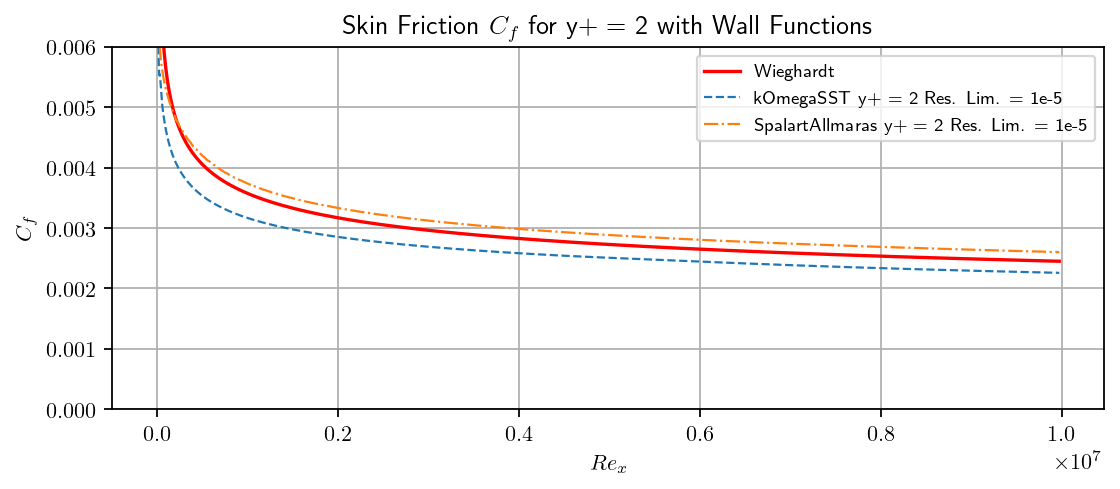

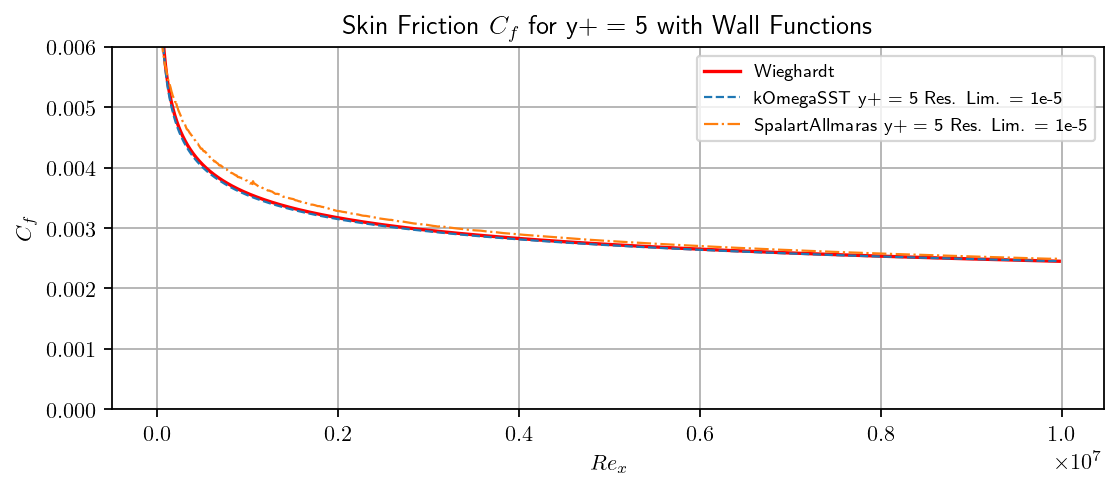

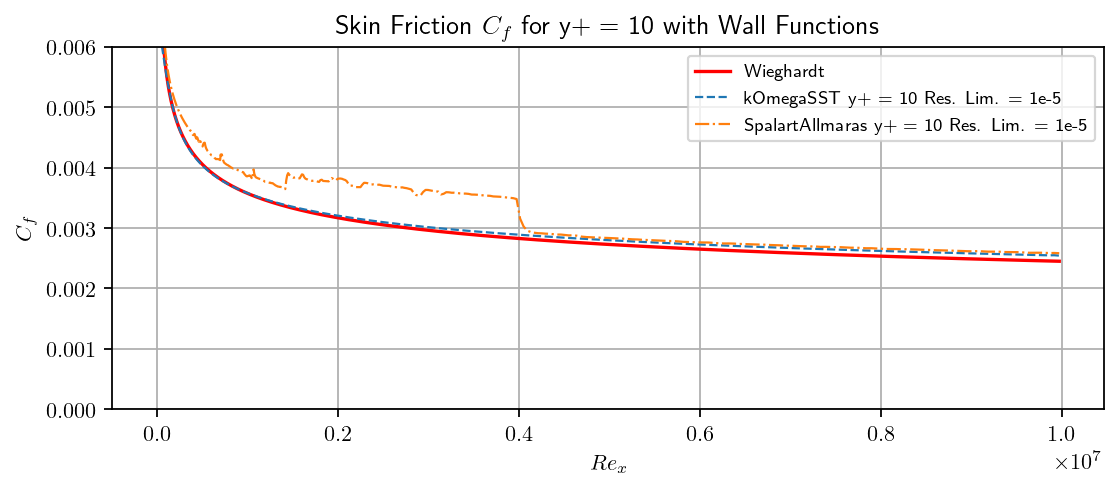

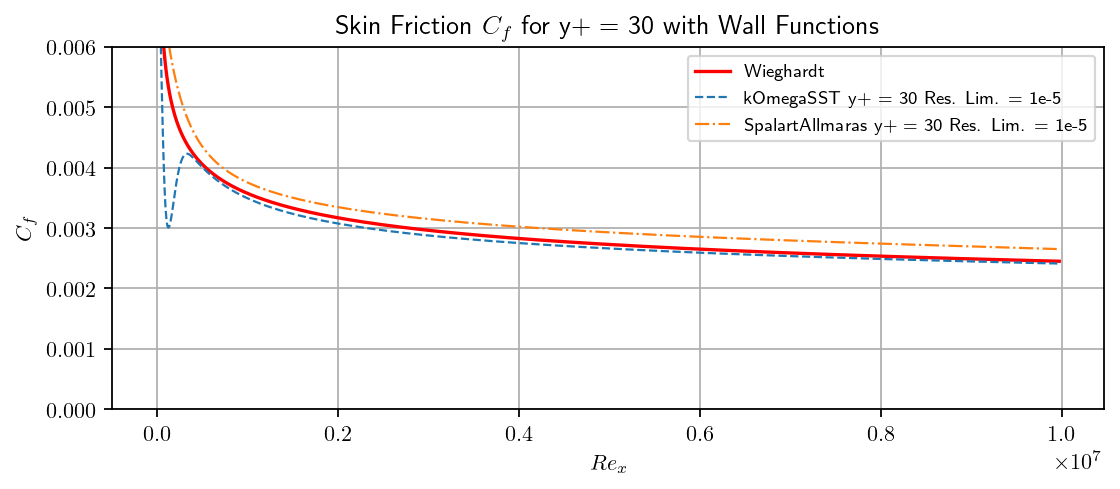

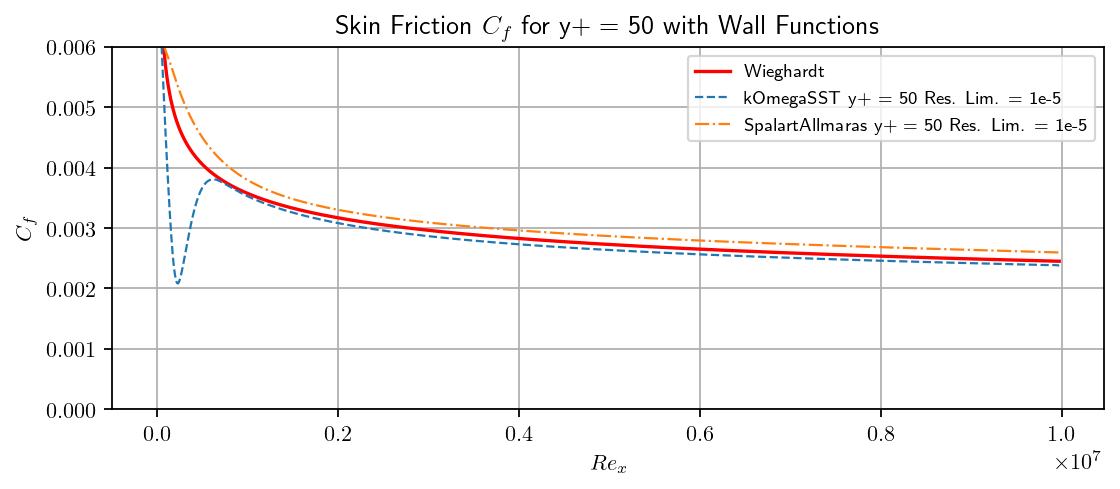

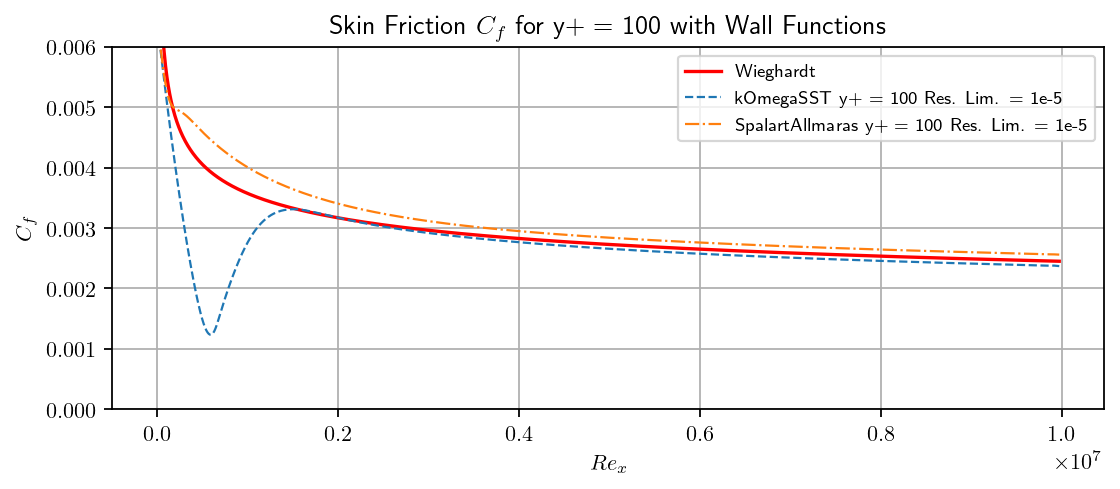

In [16]:
style5 = ["--", "-."]
lw5 = 1.0
for j in range(len(yp)):
    fig5, ax5 = plt.subplots(1, 1, figsize=(8, 3))
    plt.ylim([0, 0.006])
    plt.grid()
    ax5.set_xlabel(r"$Re_x$")
    ax5.set_ylabel(r"$C_f$")
    plt.title(r"Skin Friction $C_f$ for y+ = {} with Wall Functions".format(yp[j]))
    ax5.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
    for i in range(len(res_list)):
        ax5.plot(Rex, Cf[i + len(res_list)*j], label = "{} y+ = {} Res. Lim. = 1e-5".format(model, yp[j]), ls = style5[i], c = "C{:d}".format(i), lw = lw5)
        ax5.plot(Rex, Cf_sa[i + len(res_list)*j], label = "{} y+ = {} Res. Lim. = 1e-5".format(model_sa, yp[j]), ls = style5[i+1], c = "C{:d}".format(i+1), lw = lw5)
        ax5.legend(fontsize = 8)
    plt.savefig(comparison + "tauw_yp{}_comparison_withWallFunc.pdf".format(yp[j]), bbox_inches="tight")

### 5-6. Comparison of Two Models (without Wall Functions)

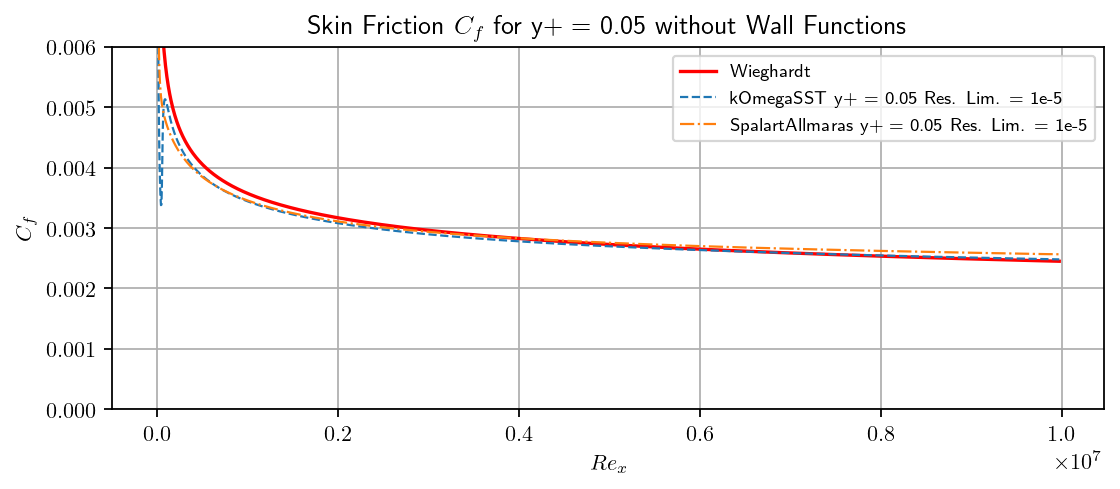

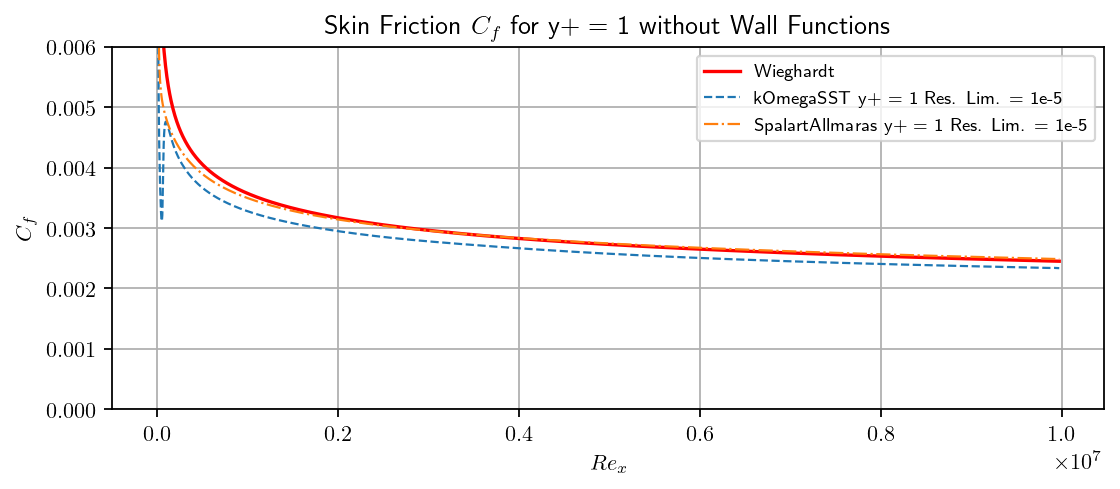

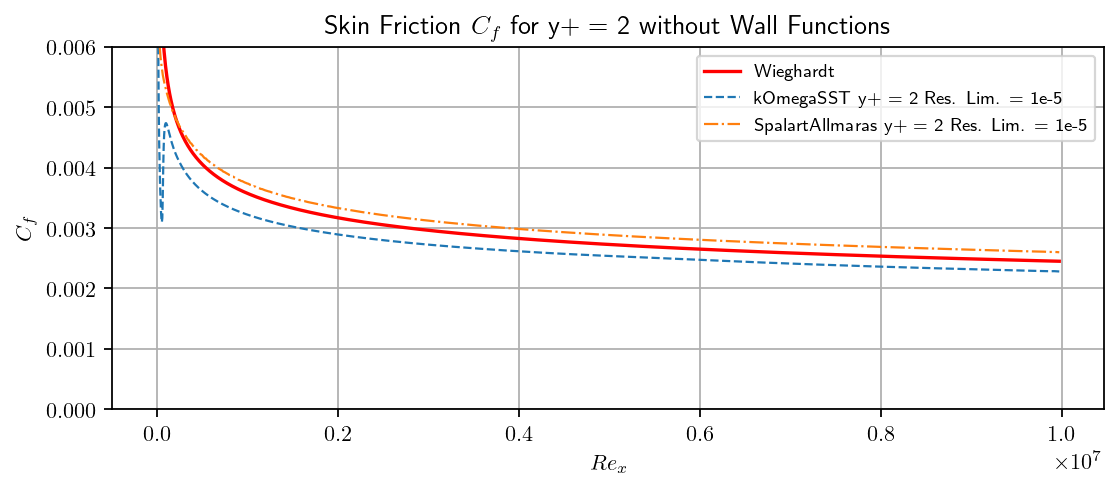

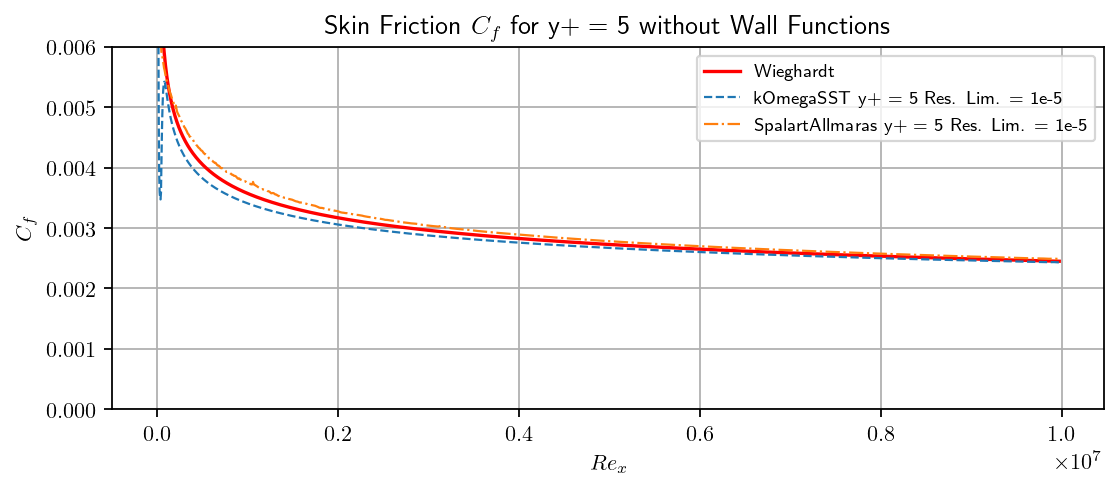

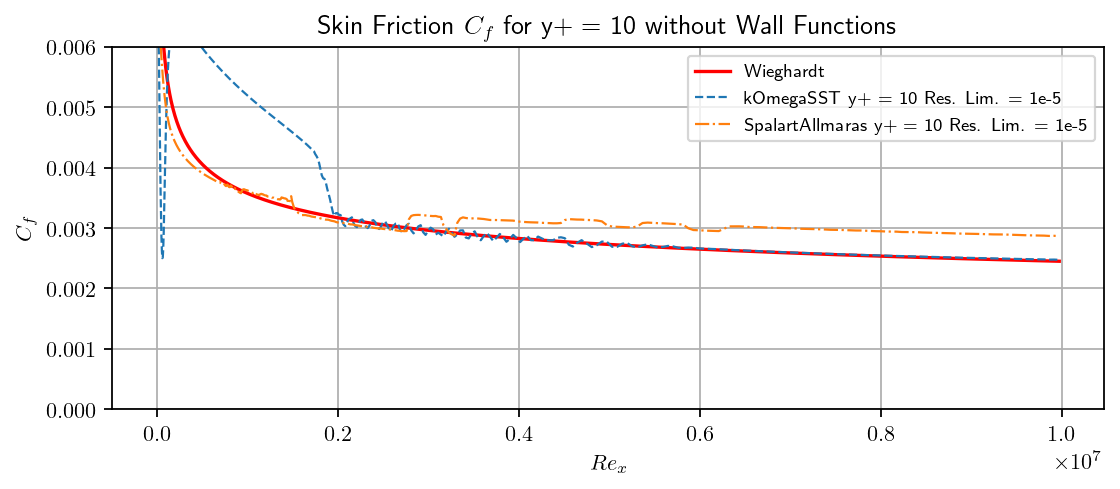

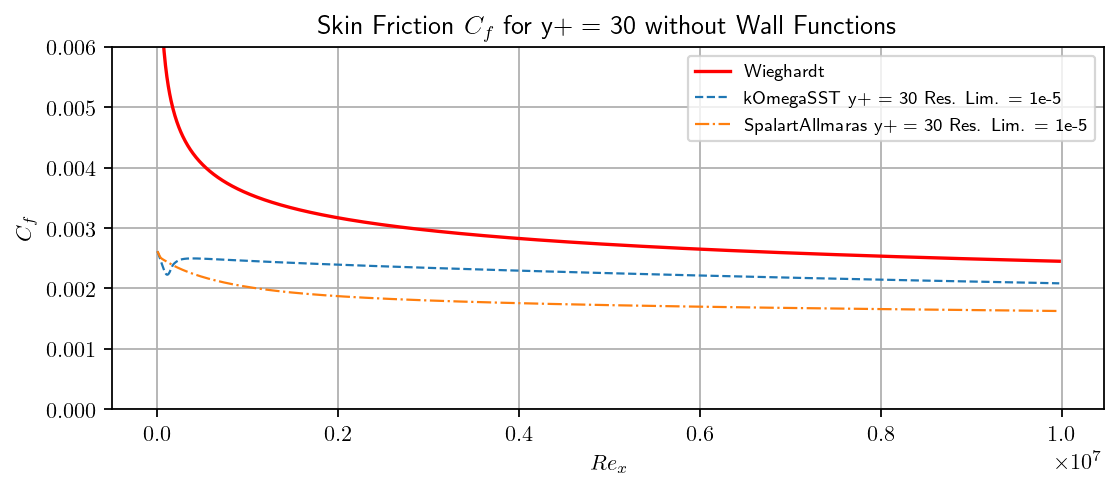

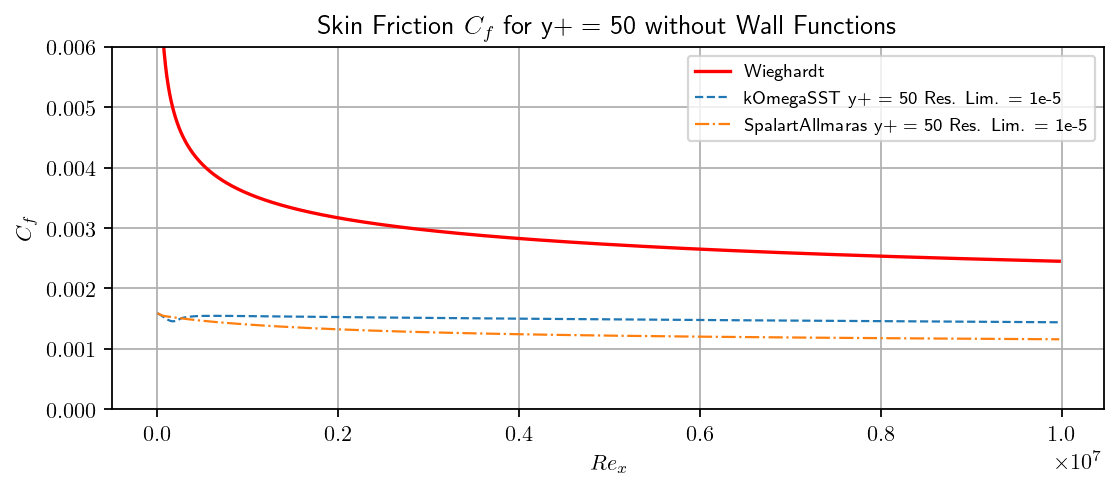

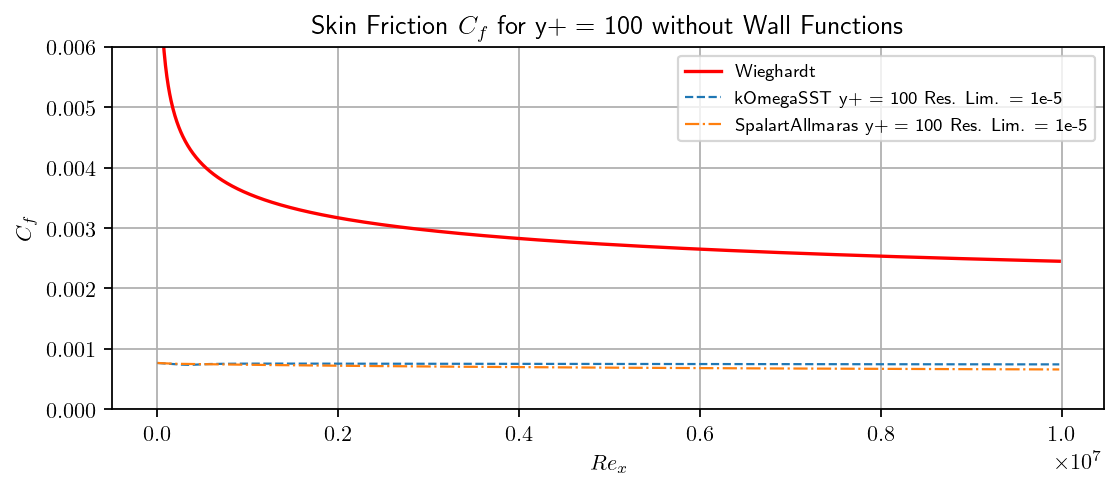

In [17]:
style6 = ["--", "-."]
lw6 = 1.0
for j in range(len(yp)):
    fig6, ax6 = plt.subplots(1, 1, figsize=(8, 3))
    plt.ylim([0, 0.006])
    plt.grid()
    ax6.set_xlabel(r"$Re_x$")
    ax6.set_ylabel(r"$C_f$")
    plt.title(r"Skin Friction $C_f$ for y+ = {} without Wall Functions".format(yp[j]))
    ax6.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
    for i in range(len(res_list)):
        ax6.plot(Rex, Cf_noWallFunc[i + len(res_list)*j], label = "{} y+ = {} Res. Lim. = 1e-5".format(model, yp[j]), ls = style6[i], c = "C{:d}".format(i), lw = lw6)
        ax6.plot(Rex, Cf_noWallFunc_sa[i + len(res_list)*j], label = "{} y+ = {} Res. Lim. = 1e-5".format(model_sa, yp[j]), ls = style6[i+1], c = "C{:d}".format(i+1), lw = lw6)
        ax6.legend(fontsize = 8)
    plt.savefig(comparison + "tauw_yp{}_comparison_noWallFunc.pdf".format(yp[j]), bbox_inches="tight")